#**Reza Dehkordi**
#**02-14-2021**

# **I. OVERVIEW**
The goal of this statistical analysis is to explore a data regarding diabetes progression and the relationship to different attirbutes. We also want to see, using which one of the independent variables can result to best linear regression model to the provided data. 

The data is extracted from the diabetes dataset of sklearn library( breif description: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).
Some code used in this notebook has been aquired from the Exercise4 of INET 4061 course as well as from Jaques Grobler License: BSD 3 clause.


# **II. Data**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm


In [ ]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# converting dataset to pandas dataframe
print('The following is the information provided regarding specific aspects of the data:\n')
print(diabetes.DESCR)


The following is the information provided regarding specific aspects of the data:

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https

#**III. Exploratory Data Analysis**

In [ ]:
# Perform EDA:
print("shape: ")
print(df.shape)
print("\ncheck missing values per each attirbute:")
print(df.isnull().sum() )


shape: 
(442, 10)

check missing values per each attirbute:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [ ]:
print("Summary for numeric independent variables:")
df.describe()

Summary for numeric independent variables:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


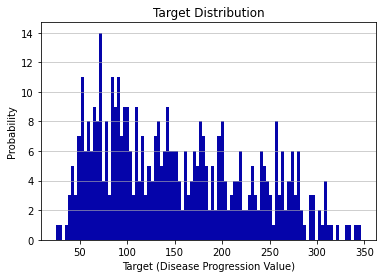

In [ ]:
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

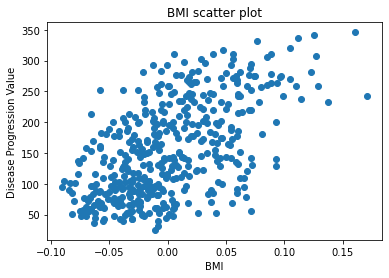

In [ ]:
plt.scatter(df.bmi, diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: vmin, vmax. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


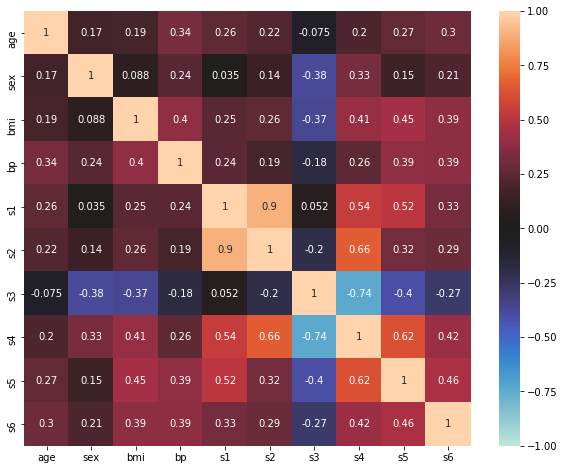

In [ ]:
# correlation Matrix:
import seaborn as sns
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
fig, ax = plt.subplots(figsize=(10,8))
corrmat = df.corr() # Omit year
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);

**Collinearity Issue?**
> yes, from the correlation matrix there seems to be a significatn positive correlation between s1 & s2, s2 & s4, s4 & s5, and a significant negative correlation between s3 & s4.

#**IV. Models:**

## **Single Linear Regression (Indep. Var: BMI)**


Coefficient(slope): 
 [938.23786125]
Coefficient(intercept): 
 152.91886182616167
Mean squared error: 2548.07
Coefficient of determination: 0.47


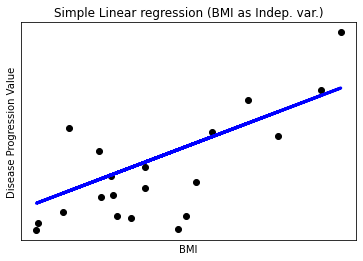

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only BMI feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# The coefficients
print('Coefficient(slope): \n', regr.coef_)
print('Coefficient(intercept): \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('Simple Linear regression (BMI as Indep. var.)')

plt.show()

**Model Accuracy:**
> based on the Coefficient of determination we can tell that 47% of the variation is explained by the model.

**formula (y = mx + b)  of the regression line:**
> y = 938.23786125x + 152.91886182616167

In [ ]:
# checking if model should be accepted
slm = sm.OLS(diabetes_y_train, diabetes_X_train).fit()
slm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              32.83
Date:                Mon, 15 Feb 2021   Prob (F-statistic):                    1.92e-08
Time:                        03:19:29   Log-Likelihood:                         -2754.4
No. Observations:                 422   AIC:                                      5511.
Df Residuals:                     421   BIC:                                      5515.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           970.1672    169.321      5.730      0.000     637.347    1302.987
==============================================================================
Omnibus:                       10.658   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.466
Skew:                           0.128   Prob(JB):                       0.0394
Kurtosis:                       2.450   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Reject/Accept Model:**
> Yes, with a F-statistic of 32.83 and since the P-value of 1.92e-08 is much smaller than the significance level of 0.01, there is much less than 1% chance that the F-statistic of 32.83 could have occurred by chance under the assumption of a valid Null hypothesis. Therefore we can reject the null hypothesis and say that the model fits the data better than the intercept-only model and therefore can be accepted.

## **Muliple Linear regression With All Indep. Vars.**

In [ ]:
diabetes_X = diabetes.data

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))
print('Coefficient(intercept): \n', lm.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
 
# get feature names
colnames = np.asarray(df.columns)

df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 
#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()



Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
<class 'numpy.ndarray'>
Coefficient(intercept): 
 152.76430691633442
Mean squared error: 2004.57
Coefficient of determination: 0.59


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           4.64e-58
Time:                        03:19:29   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
x1             0.3035     61.286      0.005      0.996    -120.169     120.776
x2          -237.6393     62.837     -3.782      0.000    -361.162    -114.117
x3           510.5306     68.156      7.491      0.000     376.553     644.508
x4           327.7370     66.876      4.901      0.000     196.275     459.199
x5          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
x6           492.8146    344.227      1.432      0.153    -183.850    1169.480
x7           102.8485    219.463      0.469      0.640    -328.561     534.258
x8           184.6065    167.336      1.103      0.271    -144.334     513.547
x9           743.5196    175.359      4.240      0.000     398.807    1088.232
x10           76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Accuracy:**

based on the Coefficient of determination we can tell that 59% of the variation is explained by the model.

**formula (y = mx + b)  of the regression line:**
> y = 152.76430691633442 + 3.03499549e-01x1 - 2.37639315e+02x2 + 5.10530605e+02x3 + 3.27736980e+02x4 - 8.14131709e+02x5 + 4.92814588e+02x6 + 1.02848452e+02x7 + 1.84606489e+02x8 + 7.43519617e+02x9 + 7.60951722e+01x10

**Reject/Accept Model:**
> Yes, with a F-statistic of 	43.16 and since the P-value of 4.64e-58 is much smaller than the significance level of 0.01, there is much less than 1% chance that the F-statistic of 	43.16 could have occurred by chance under the assumption of a valid Null hypothesis. Therefore we can reject the null hypothesis and say that the model fits the data better than the intercept-only model and therefore can be accepted.

## **Alternative Multiple Linear Regression Model**

In [ ]:
diabetes_X = X = df[['sex','age','bp','bmi','s1','s5','s6']]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)
print ( type(fit.coef_))
print('Coefficient(intercept): \n', lm.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
 
# get feature names
colnames = np.asarray(df.columns)

df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 
#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()


Coefficients: 
 [-152.01040399  -11.71300038  295.34060322  580.584991   -225.23120606
  628.18436846  103.19648743]
<class 'numpy.ndarray'>
Coefficient(intercept): 
 152.80283633369243
Mean squared error: 1947.13
Coefficient of determination: 0.60


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     58.05
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           1.10e-57
Time:                        03:19:29   Log-Likelihood:                -2288.3
No. Observations:                 422   AIC:                             4593.
Df Residuals:                     414   BIC:                             4625.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8028      2.694     56.724      0.000     147.508     158.098
sex         -152.0104     58.985     -2.577      0.010    -267.959     -36.062
age          -11.7130     61.874     -0.189      0.850    -133.340     109.914
bp           295.3406     67.094      4.402      0.000     163.453     427.228
bmi          580.5850     66.201      8.770      0.000     450.454     710.716
s1          -225.2312     67.756     -3.324      0.001    -358.420     -92.042
s5           628.1844     74.713      8.408      0.000     481.321     775.048
s6           103.1965     68.727      1.502      0.134     -31.901     238.294
==============================================================================
Omnibus:                        2.167   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.968
Skew:                           0.077   Prob(JB):                        0.374
Kurtosis:                       2.703   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comparison with first multiple linear regression**
Instead of using all independednt variables in this milti linear regression I used the following variables, sex, age, bp, bmi, s1, s5, and s6, excluding the variables that were correlated with each other(I Stepwise). As seen on the results of the model above, the model has a slightly higher coefficient of determination(0.60 compared to 0.59), it also had a lower mean square error(1947.13 compared to 2004.57), and a higher F-statistic (58.05 vs 42.6). From these comparisons, it is fair to conclude that this model fits the data better and can predict disease progress more accuratly.

#**V. Conclusion**
In this lab there were three different regression models conducted. the first was a simplre regression model using only BMI as the independent variable the results were the significantly low p-value of the F-statistic helped us reject H0. The second model was a multiple regression model using all independent varaibles to predict the data. This resulted in a higher coefficient of determination as well as a higher F-statistic and P-value which indicated that this was a better model than the first model. For the third model, Using the Correlation Matrix I excluded the independet variables with significant correlation to one another and was able to improve the model by doing yet another multiple regression with the non-correlated independent variables.

In conclusion using a simple regression and multiple regression can give us a reletivly accurate model to predict diabetes progress but in the future, more complex models can be investigates to see if a better fit is avalible.